In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
# Read Data
df = pd.read_csv('rawdata.csv')

# Clean Data
df_cleaned = df.drop_duplicates()
df_cleaned = df.dropna()
df_cleaned = df_cleaned.filter(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'st_teff', 'st_rad',
       'st_mass', 'st_met', 'st_metratio', 'st_logg', 'sy_dist'])

In [138]:
# Calculate Density
#OpenAI. (2025). ChatGPT (Sept 20 version) [Large language model].
#Retrieved from https://chat.openai.com/
EARTH_MASS_KG = 5.972e24
EARTH_RADIUS_M = 6.371e6  # meters


df_cleaned["density_kg_m3"] = (
    df_cleaned["pl_bmasse"] * EARTH_MASS_KG
    / ((4/3) * np.pi * (df_cleaned["pl_rade"] * EARTH_RADIUS_M) ** 3)
)


# If you want g/cm³:
df_cleaned["density_g_cm3"] = df_cleaned["density_kg_m3"] / 1000

# Calculate Inner Boundary
df_cleaned["planet_type"] = np.where(
    df_cleaned["density_g_cm3"] >= 3,
    "Terrestrial",
    "Gaseous"
)


In [139]:
#Interactive Density Distribution Plot
#OpenAI. (2025). ChatGPT (Sept 20 version) [Large language model].
#Retrieved from https://chat.openai.com/
import plotly.express as px


fig = px.histogram(
    df_cleaned,
    x="density_g_cm3",       # numeric column on x-axis
    color="planet_type",     # hue by category
    nbins=30,
    barmode="overlay",
    title="Interactive Planet Density Distribution"
)
fig.update_layout(
    xaxis_title="Density (g/cm³)",
    yaxis_title="Number of Planets",
    bargap=0.05
)
fig.show()

In [140]:
print(df_cleaned["planet_type"].value_counts())

planet_type
Gaseous        119
Terrestrial     78
Name: count, dtype: int64


<Axes: xlabel='density_g_cm3', ylabel='Count'>

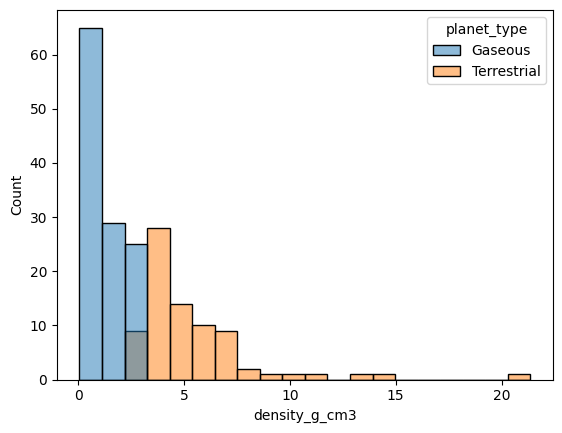

In [141]:
#Static Density Distribution Plot
df_cleaned.head()

sns.histplot(data=df_cleaned,x="density_g_cm3",hue="planet_type")

In [142]:
df_cleaned["f_radius"]      = df_cleaned["pl_rade"].between(0.5, 1.6)
df_cleaned["f_mass"]        = df_cleaned["pl_bmasse"].between(0.2, 5.0)
df_cleaned["f_insolation"]  = df_cleaned["pl_insol"].between(0.35, 1.75)
df_cleaned["f_eq_temp"]     = df_cleaned["pl_eqt"].between(180, 310)
df_cleaned["f_star_teff"]   = df_cleaned["st_teff"].between(3500, 6500)
df_cleaned["f_eccentric"]   = df_cleaned["pl_orbeccen"] < 0.2


In [143]:
print(df_cleaned["pl_rade"].describe())
print(df_cleaned["pl_bmasse"].describe())
print(df_cleaned["pl_insol"].describe())
print(df_cleaned["pl_eqt"].describe())
print(df_cleaned["st_teff"].describe())
print(df_cleaned["pl_orbeccen"].describe())

count    197.000000
mean       6.896561
std        5.162238
min        0.640000
25%        2.390000
50%        5.090000
75%       11.679758
max       22.193820
Name: pl_rade, dtype: float64
count     197.000000
mean      274.382701
std       584.274312
min         0.070000
25%         7.320000
50%        30.000000
75%       254.000000
max      4096.808166
Name: pl_bmasse, dtype: float64
count     197.000000
mean      358.176136
std       796.846229
min         0.342000
25%        12.920000
50%        46.700000
75%       308.000000
max      5805.000000
Name: pl_insol, dtype: float64
count     197.000000
mean      887.538934
std       489.909658
min       251.000000
25%       528.000000
50%       723.000000
75%      1192.000000
max      2429.000000
Name: pl_eqt, dtype: float64
count     197.000000
mean     4890.791878
std      1033.142503
min      2960.000000
25%      3841.000000
50%      5083.000000
75%      5725.000000
max      7690.000000
Name: st_teff, dtype: float64
count    197.000

In [144]:
criteria_cols = [
    "f_radius", "f_mass", "f_insolation",
    "f_eq_temp", "f_star_teff", "f_eccentric"
]

df_cleaned["Potential Habitability"] = df_cleaned[criteria_cols].sum(axis=1)

Potential Habitability
2    121
1     38
3     23
4     14
0      1
Name: count, dtype: int64

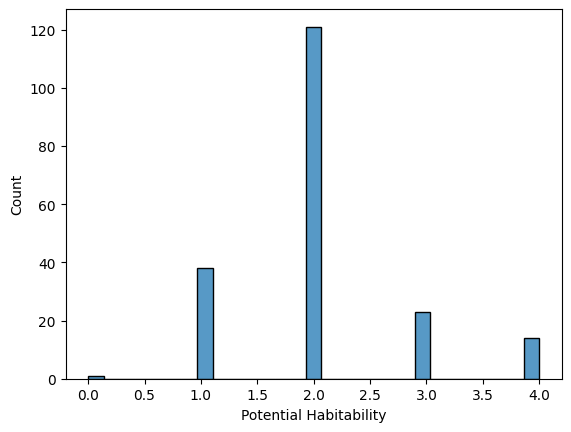

In [145]:
sns.histplot(data=df_cleaned,x="Potential Habitability")
df_cleaned.value_counts("Potential Habitability")

In [146]:
df_cleaned

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.10730,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.04700,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.13000,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.22000,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.01570,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37781,WASP-19 b,WASP-19,1,1,1,0,0.788839,0.01652,15.860708,1.415000,...,506.803039,0.506803,Gaseous,False,False,False,False,True,True,2
37791,WASP-193 b,WASP-193,1,1,1,0,6.246334,0.06760,16.409948,1.464000,...,55.118107,0.055118,Gaseous,False,False,False,False,True,True,2
38369,WASP-76 b,WASP-76,0,2,1,0,1.809882,0.03304,20.680569,1.845000,...,180.283094,0.180283,Gaseous,False,False,False,False,True,True,2
38373,WASP-77 A b,WASP-77 A,0,2,1,0,1.360029,0.02335,13.787046,1.230000,...,1114.610134,1.114610,Gaseous,False,False,False,False,True,True,2


In [ ]:
print(df_cleaned["f_eccentric"].value_counts())
print(df_cleaned["f_star_teff"].value_counts())
print(df_cleaned["f_eq_temp"].value_counts())
print(df_cleaned["f_insolation"].value_counts())
print(df_cleaned["f_mass"].value_counts())
print(df_cleaned["f_radius"].value_counts())


f_eccentric
True     167
False     30
Name: count, dtype: int64
f_star_teff
True     167
False     30
Name: count, dtype: int64
f_eq_temp
False    193
True       4
Name: count, dtype: int64
f_insolation
False    194
True       3
Name: count, dtype: int64
f_mass
False    161
True      36
Name: count, dtype: int64
f_radius
False    169
True      28
Name: count, dtype: int64


In [147]:
df_cleaned

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.10730,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.04700,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.13000,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.22000,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.01570,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37781,WASP-19 b,WASP-19,1,1,1,0,0.788839,0.01652,15.860708,1.415000,...,506.803039,0.506803,Gaseous,False,False,False,False,True,True,2
37791,WASP-193 b,WASP-193,1,1,1,0,6.246334,0.06760,16.409948,1.464000,...,55.118107,0.055118,Gaseous,False,False,False,False,True,True,2
38369,WASP-76 b,WASP-76,0,2,1,0,1.809882,0.03304,20.680569,1.845000,...,180.283094,0.180283,Gaseous,False,False,False,False,True,True,2
38373,WASP-77 A b,WASP-77 A,0,2,1,0,1.360029,0.02335,13.787046,1.230000,...,1114.610134,1.114610,Gaseous,False,False,False,False,True,True,2


<Axes: xlabel='pl_rade', ylabel='Count'>

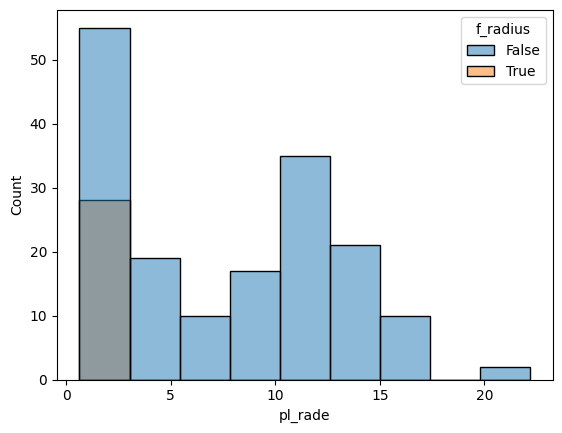

In [148]:
sns.histplot(data=df_cleaned,x="pl_rade",hue="f_radius")

<Axes: xlabel='pl_bmasse', ylabel='Count'>

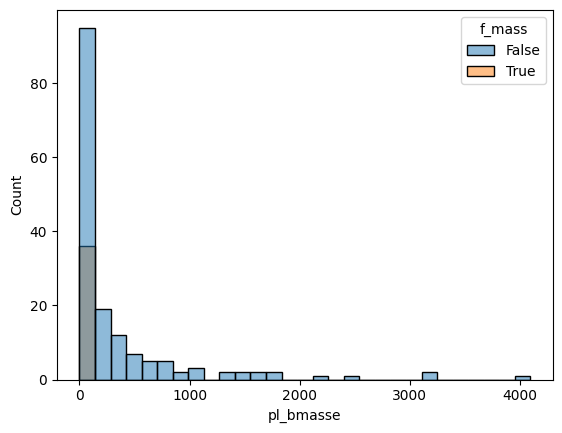

In [149]:
sns.histplot(data=df_cleaned,x="pl_bmasse",hue="f_mass")

<Axes: xlabel='pl_insol', ylabel='Count'>

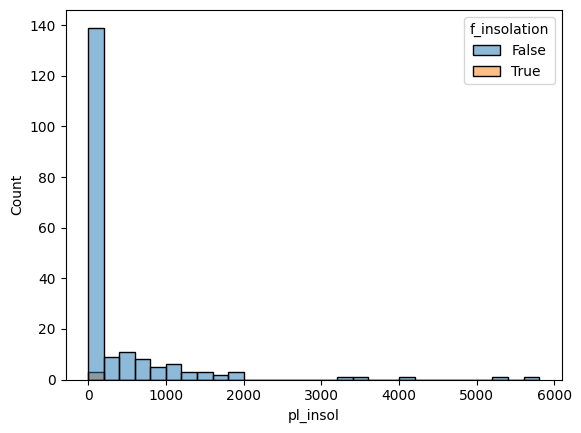

In [150]:
sns.histplot(data=df_cleaned,x="pl_insol",hue="f_insolation")

<Axes: xlabel='pl_eqt', ylabel='Count'>

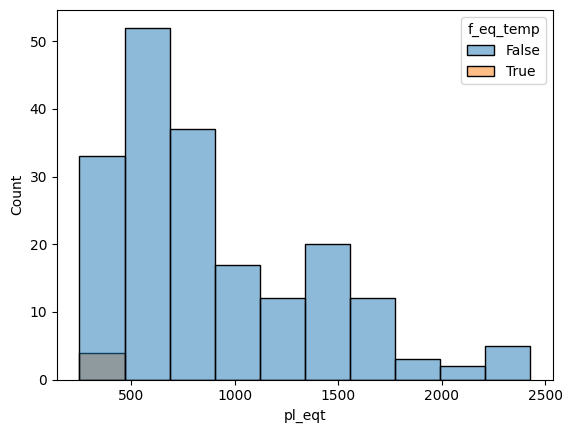

In [151]:
sns.histplot(data=df_cleaned,x="pl_eqt",hue="f_eq_temp")

<Axes: xlabel='st_teff', ylabel='Count'>

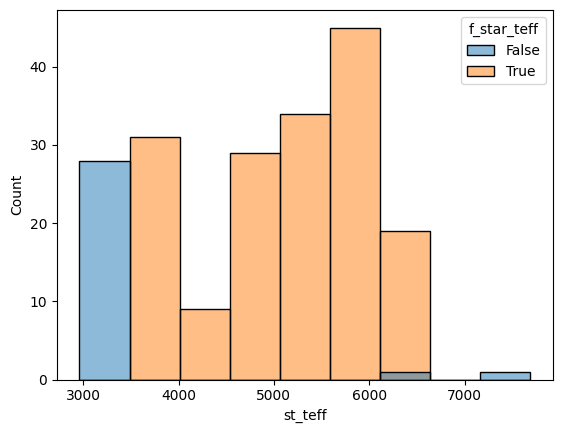

In [152]:
sns.histplot(data=df_cleaned,x="st_teff",hue="f_star_teff")

In [153]:
df_cleaned.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.339890,0.1073,2.840000,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2
512,EPIC 249893012 b,EPIC 249893012,1,1,3,0,3.595100,0.0470,1.950000,0.173967,...,6505.978046,6.505978,Terrestrial,False,False,False,False,True,True,2
513,EPIC 249893012 c,EPIC 249893012,1,1,3,0,15.624000,0.1300,3.670000,0.327415,...,1636.214721,1.636215,Gaseous,False,False,False,False,True,True,2
514,EPIC 249893012 d,EPIC 249893012,1,1,3,0,35.747000,0.2200,3.940000,0.351503,...,917.629754,0.917630,Gaseous,False,False,False,False,True,True,2
535,GJ 1132 b,GJ 1132,1,1,2,0,1.628929,0.0157,1.191515,0.106300,...,5987.296479,5.987296,Terrestrial,True,True,False,False,False,True,3


<Axes: xlabel='pl_orbeccen', ylabel='Count'>

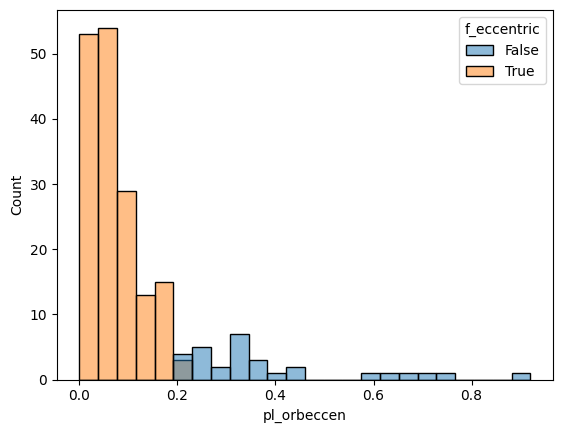

In [154]:
sns.histplot(data=df_cleaned,x="pl_orbeccen",hue="f_eccentric")

In [ ]:
df_cleaned.head(1)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,density_kg_m3,density_g_cm3,planet_type,f_radius,f_mass,f_insolation,f_eq_temp,f_star_teff,f_eccentric,Potential Habitability
500,EPIC 220674823 c,EPIC 220674823,1,1,2,0,13.33989,0.1073,2.84,0.253368,...,1761.831763,1.761832,Gaseous,False,False,False,False,True,True,2


In [ ]:
for idx, row in df_cleaned.iterrows():
    if row["Potential Habitability"] >= 4:
        print(row["pl_name"])

GJ 367 b
HD 136352 b
HD 219134 c
HD 23472 d
HD 23472 e
HD 23472 f
HD 260655 b
HD 260655 c
K2-266 c
K2-3 c
Kepler-138 c
Kepler-138 d
TOI-1266 c
TOI-500 b


In [ ]:

from sklearn.preprocessing import StandardScaler


# --- 1) Set up columns and Earth reference (matching your labels) ---
cols = ["pl_rade","pl_bmasse","pl_insol","pl_eqt","st_teff","pl_orbeccen"]
earth = {
    "pl_rade": 1.0,          # Earth radii
    "pl_bmasse": 1.0,        # Earth masses
    "pl_insol": 1.0,         # Earth = 1 S_earth
    "pl_eqt": 255.0,         # K (equilibrium temp)
    "st_teff": 5772.0,       # K (Sun)
    "pl_orbeccen": 0.0167,   # Earth's orbital eccentricity
}

# --- 2) Build matrix X and fit scaler on rows that have all six values ---
mask = df_cleaned[cols].notna().all(axis=1)
X = df_cleaned.loc[mask, cols].astype(float).values

scaler = StandardScaler().fit(X)
Xz = scaler.transform(X)

# Earth vector standardized with the SAME scaler (so they’re comparable)
earth_vec = np.array([[earth[c] for c in cols]])
earth_z = scaler.transform(earth_vec)[0]

# --- 3) Distance to Earth in z-score space (Euclidean) ---
dist = np.sqrt(((Xz - earth_z)**2).sum(axis=1))

# Put distances back into the dataframe (NaN where features were missing)
df_cleaned["dist_earth_z"] = np.nan
df_cleaned.loc[mask, "dist_earth_z"] = dist


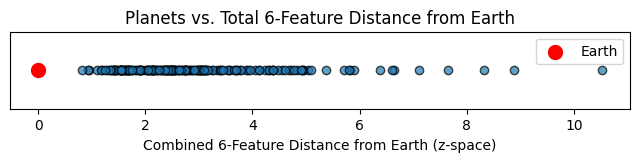

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,1))
plt.scatter(df_cleaned["dist_earth_z"], [0]*len(df_cleaned),
            alpha=0.7, edgecolor="k")

plt.xlabel("Combined 6-Feature Distance from Earth (z-space)")
plt.yticks([])               # hide y-axis for a 1-D look
plt.title("Planets vs. Total 6-Feature Distance from Earth")

# highlight Earth
plt.scatter([0], [0], color="red", s=100, label="Earth")
plt.legend()
plt.show()